Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('./merged_dataset.csv')

In [3]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S35_4,202.632000,565.740000,177.258000,0.016270,0.000080,0.009190,0.009630,0.027560,0.071700,...,0.105460,0.078890,14.989000,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173
1,phon_R01_S02_2,107.332000,113.840000,104.315000,0.002900,0.000030,0.001440,0.001820,0.004310,0.015670,...,0.024870,0.003440,26.892000,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
2,phon_R01_S07_2,199.382154,209.693907,191.973063,0.116101,0.004157,0.159846,0.043134,-0.058774,0.129600,...,0.026568,-0.006818,30.908897,0,0.420614,0.714049,-7.749298,0.106569,2.162500,-0.060096
3,phon_R01_S43_1,112.414658,133.337683,105.794235,-0.199640,-0.197199,-0.002176,-0.042493,-0.059883,-0.057149,...,0.182758,0.045046,26.583589,0,0.398632,0.662768,-6.244178,0.156079,2.230395,0.111724
4,phon_R01_S33_4,113.166000,130.270000,100.673000,0.005020,0.000040,0.002570,0.003120,0.007720,0.052790,...,0.086890,0.036900,16.747000,1,0.625362,0.708617,-4.654894,0.304107,2.672362,0.274387


In [4]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(295, 24)

In [5]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              295 non-null    object 
 1   MDVP:Fo(Hz)       295 non-null    float64
 2   MDVP:Fhi(Hz)      295 non-null    float64
 3   MDVP:Flo(Hz)      295 non-null    float64
 4   MDVP:Jitter(%)    295 non-null    float64
 5   MDVP:Jitter(Abs)  295 non-null    float64
 6   MDVP:RAP          295 non-null    float64
 7   MDVP:PPQ          295 non-null    float64
 8   Jitter:DDP        295 non-null    float64
 9   MDVP:Shimmer      295 non-null    float64
 10  MDVP:Shimmer(dB)  295 non-null    float64
 11  Shimmer:APQ3      295 non-null    float64
 12  Shimmer:APQ5      295 non-null    float64
 13  MDVP:APQ          295 non-null    float64
 14  Shimmer:DDA       295 non-null    float64
 15  NHR               295 non-null    float64
 16  HNR               295 non-null    float64
 1

In [6]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,...,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,164.943555,208.704473,126.830593,0.009871,-0.011848,0.004418,0.000471,0.005965,0.014031,0.242381,...,0.043261,0.011212,22.795134,0.498305,0.493736,0.715867,-6.082598,0.206310,2.299155,0.175025
std,46.691989,92.552445,51.557492,0.054066,0.051890,0.046226,0.048999,0.054177,0.065781,0.182139,...,0.073101,0.073235,4.418847,0.500847,0.117592,0.078619,1.103468,0.105930,0.372453,0.115580
min,88.333000,102.145000,65.476000,-0.199640,-0.251498,-0.172702,-0.211714,-0.160408,-0.246441,-0.140778,...,-0.277478,-0.198765,8.441000,0.000000,0.036556,0.327848,-8.018410,-0.113119,1.423287,-0.235248
25%,120.079000,138.475086,88.027500,0.003005,0.000010,0.001270,0.001475,0.003495,0.010810,0.132500,...,0.021805,0.004580,19.538500,0.000000,0.420499,0.665329,-6.996612,0.148321,2.019672,0.110119
50%,156.239000,202.450000,107.802000,0.005190,0.000030,0.002440,0.002610,0.006960,0.019970,0.192409,...,0.038360,0.012110,23.162000,0.000000,0.489345,0.719576,-6.244178,0.210185,2.277927,0.177807
75%,201.944675,240.763665,163.866000,0.013150,0.000070,0.004795,0.004815,0.012840,0.039405,0.287756,...,0.070542,0.038495,25.529207,1.000000,0.576304,0.757752,-5.426944,0.271961,2.538126,0.244544
max,260.117440,592.205062,239.175904,0.262378,0.151307,0.159846,0.149783,0.221077,0.209636,1.302000,...,0.209233,0.314820,33.047000,1.000000,0.854788,1.055572,-2.434031,0.529259,3.671155,0.527367


In [8]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
0    148
1    147
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [9]:
# grouping the data bas3ed on the target variable
#parkinsons_data.groupby('status').mean()
parkinsons_data['status'] = pd.to_numeric(parkinsons_data['status'], errors='coerce')

# Now you can apply the mean function
mean_value = parkinsons_data['status'].mean()

Data Pre-Processing

Separating the features & Target

In [10]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [11]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0     202.632000    565.740000    177.258000        0.016270   
1     107.332000    113.840000    104.315000        0.002900   
2     199.382154    209.693907    191.973063        0.116101   
3     112.414658    133.337683    105.794235       -0.199640   
4     113.166000    130.270000    100.673000        0.005020   
..           ...           ...           ...             ...   
290   116.879000    131.897000    108.153000        0.007880   
291   116.225605    177.321645     96.678614       -0.163058   
292   116.225605    177.321645     96.678614       -0.163058   
293   169.774000    191.759000    151.451000        0.015680   
294   237.226000    247.326000    225.227000        0.002980   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            0.000080  0.009190  0.009630    0.027560      0.071700   
1            0.000030  0.001440  0.001820    0.004310      0.015670   
2            0.004

In [12]:
print(Y)

0      1
1      1
2      0
3      0
4      1
      ..
290    1
291    0
292    0
293    1
294    0
Name: status, Length: 295, dtype: int64


Splitting the data to training data & Test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(295, 22) (236, 22) (59, 22)


Data Standardization

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [18]:
print(X_train)

[[ 1.52953087  0.31278661  1.91885556 ...  0.8332917  -1.23981747
  -1.91991616]
 [-1.02204148 -0.89555513 -0.4105617  ... -0.15180935 -0.73120317
   0.34490004]
 [-1.09977117 -0.97262785 -0.59628827 ... -0.34314935 -1.16059903
  -0.28145036]
 ...
 [-1.12136295 -0.80016732 -0.42844227 ...  0.10617867 -0.27563545
  -0.13002669]
 [ 0.67079201 -0.05755024  1.21485676 ...  1.4971152  -1.20340385
  -0.9845254 ]
 [ 1.64429624  0.42632128  1.8958368  ... -0.48092739  0.81394472
  -0.46722685]]


Model Training

Support Vector Machine Model

In [19]:
knn_pipe=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=9))
knn_pipe.fit(X_train, Y_train)
k = 3  # You can choose the value of k based on experimentation
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, Y_train)
y_pred = knn_classifier.predict(X_test_scaled)

Model Evaluation

Accuracy Score

In [20]:
# accuracy score on training data
X_test_prediction = knn_classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

y_pred = knn_classifier.predict(X_test)
PRF_Micro = precision_recall_fscore_support(Y_test, y_pred, average='micro')
PRF_Macro = precision_recall_fscore_support(Y_test, y_pred, average='macro')

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Precision, Recall, F1-Score (Micro)")
print("Precision:", PRF_Micro[0])
print("Recall:", PRF_Micro[1])
print("F1-Score:", PRF_Micro[2])

conf_matrix = confusion_matrix(Y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Accuracy score of test data :  0.847457627118644
Accuracy: 0.847457627118644
Confusion Matrix:
 [[21  8]
 [ 1 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82        29
           1       0.78      0.97      0.87        30

    accuracy                           0.85        59
   macro avg       0.87      0.85      0.84        59
weighted avg       0.87      0.85      0.84        59

Precision, Recall, F1-Score (Micro)
Precision: 0.847457627118644
Recall: 0.847457627118644
F1-Score: 0.847457627118644
Confusion Matrix:
[[21  8]
 [ 1 29]]


Building a Predictive System

In [21]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
#input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569

#changing input data to a numpy array
'''input_data = input()
input_list = input_data.split(",")
input_data_as_numpy_array = np.array(input_list)

#reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = knn_classifier.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
 print("The Person has Parkinsons")
'''

'input_data = input()\ninput_list = input_data.split(",")\ninput_data_as_numpy_array = np.array(input_list)\n\n#reshape the numpy array\ninput_data_reshaped = input_data_as_numpy_array.reshape(1,-1)\n\n# standardize the data\nstd_data = scaler.transform(input_data_reshaped)\n\nprediction = knn_classifier.predict(std_data)\nprint(prediction)\n\n\nif (prediction[0] == 0):\n  print("The Person does not have Parkinsons Disease")\n\nelse:\n print("The Person has Parkinsons")\n'

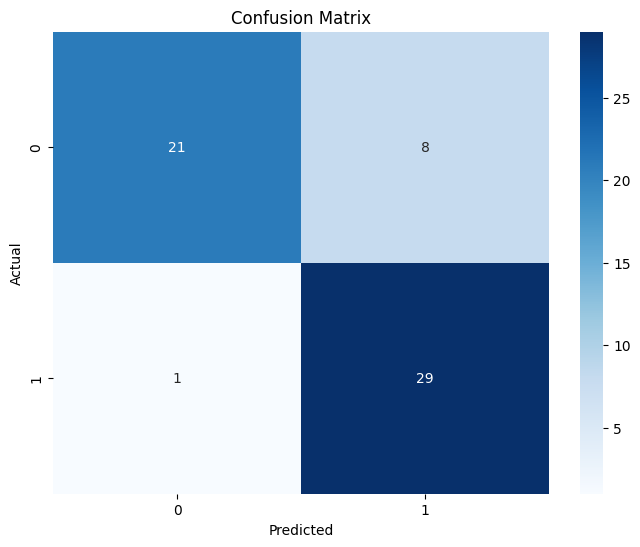

In [22]:
import tkinter as tk
import re
from tkinter import filedialog
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Function to handle model prediction
# Function to handle model prediction
def run_prediction():
    input_data = entry_var.get()
    if input_data:
        # Split the input data based on both commas and newlines
        input_list = [float(value) for value in re.split(r',|\n', input_data) if value.strip()]
        input_data_as_numpy_array = np.array(input_list)

        # Reshape the numpy array
        input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

        # Standardize the data
        std_data = scaler.transform(input_data_reshaped)

        prediction = knn_classifier.predict(std_data)

        if prediction[0] == 0:
            output_label.config(text="The Person does not have Parkinson's Disease")
        else:
            output_label.config(text="The Person has Parkinson's")

        # Plot confusion matrix in GUI
        plot_confusion_matrix()

    else:
        output_label.config(text="Please enter data first.")



# Function to plot the confusion matrix
def plot_confusion_matrix():
    # Assuming you have the `conf_matrix` variable available
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1], ax=ax)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Embed the plot into Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()


# Create the main window
root = tk.Tk()
root.title("Parkinson's Disease Prediction")

# Input label and entry field
input_label = tk.Label(root, text="Enter data (comma-separated):")
input_label.pack()
entry_var = tk.StringVar()
input_entry = tk.Entry(root, textvariable=entry_var)
input_entry.pack()

# Predict button
predict_button = tk.Button(root, text="Predict", command=run_prediction)
predict_button.pack()

# Output label for displaying prediction result
output_label = tk.Label(root, text="")
output_label.pack()

root.mainloop()

